# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Finance analyst",
    'area': 1,
    'page': 0,
    'per_page': 100
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [133]:
delay: float = 0.5
per_page: int = 100


def count_pages(job: str):
  URL = 'https://api.hh.ru/vacancies'

  params = {
      'text': job,
      'area': 1,
      'per_page': per_page
  }

  answer = requests.get(URL, params).json()['pages']
  sleep(delay)
  return answer


def get_page(job: str, page: int):
  URL = 'https://api.hh.ru/vacancies'

  params = {
      'text': job,
      'area': 1,
      'page': page,
      'per_page': per_page
  }

  answer = requests.get(URL, params).json()
  sleep(delay)
  return answer


def get_vacancies(job: str):
  data = {}

  job_pages: int = count_pages(job)
  job_info = []

  for page in range(job_pages):
    data = get_page(job, page)
    for item in data['items']:
      job_info.append(item)

  return job_info


data = get_vacancies("Data engineer")
quality_assurance = get_vacancies("QA engineer")
backend = get_vacancies("Backend developer")
architecture = get_vacancies("Software architect")
finance = get_vacancies("Finance analyst")

vacancies = data + quality_assurance + backend + architecture + finance
# print few vacancies, because apparantly in github shows full list
vacancies[:5]

[{'id': '98809395',
  'premium': False,
  'name': 'QA Engineer',
  'department': None,
  'has_test': False,
  'response_letter_required': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'salary': None,
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': None,
  'response_url': None,
  'sort_point_distance': None,
  'published_at': '2024-05-13T14:51:04+0300',
  'created_at': '2024-05-13T14:51:04+0300',
  'archived': False,
  'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98809395',
  'show_logo_in_search': None,
  'insider_interview': None,
  'url': 'https://api.hh.ru/vacancies/98809395?host=hh.ru',
  'alternate_url': 'https://hh.ru/vacancy/98809395',
  'relations': [],
  'employer': {'id': '1911705',
   'name': 'Хантфлоу',
   'url': 'https://api.hh.ru/employers/1911705',
   'alternate_url': 'https://hh.ru/employer/1911705',
   'logo_urls': {'original': 'https://img.hhcdn.ru/employer-logo-original/581223.png',
    

(1 балл) Посчитайте сколько всего найдено вакансий:

In [134]:
len(vacancies)

5932

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [135]:
def are_equal(lhs: float, rhs: float):
  eps: float = 0.000003
  return abs(lhs - rhs) < eps


class Company:
  name: str
  latitude: float | None
  longitude: float | None

  def __init__(self, vacancy):
    self.name = vacancy['employer']['name']
    if self.name[-1] == ',':
      self.name = self.name[:-1]
    if not vacancy['address']:
      self.latitude = None
      self.longitude = None
    elif not vacancy['address']['lat'] or not vacancy['address']['lng']:
      self.latitude = None
      self.longitude = None
    else:
      self.latitude = vacancy['address']['lat']
      self.longitude = vacancy['address']['lng']

  def __eq__(self, other):
    if self.name != other.name:
      return False
    if self.latitude and not other.latitude:
      return False
    if not self.latitude and other.latitude:
      return False
    if not self.latitude and not other.latitude:
      return True
    return are_equal(self.latitude, other.latitude) and are_equal(self.longitude, other.longitude)

  def __lt__(self, other):
    return self.name < other.name

  def __str__(self):
    answer: str = f"{self.name}\n"
    if self.latitude:
      answer += f"{self.latitude} {self.longitude}\n"
    return answer

  def __repr__(self):
    answer: str = f"{self.name}\n"
    if self.latitude:
      answer += f"{self.latitude} {self.longitude}\n"
    return answer


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [136]:
companies = []
types = []
for vacancy in data:
  companies.append(Company(vacancy))
  types.append('data')

for vacancy in quality_assurance:
  companies.append(Company(vacancy))
  types.append('qa')

for vacancy in backend:
  companies.append(Company(vacancy))
  types.append('back')

for vacancy in architecture:
  companies.append(Company(vacancy))
  types.append('arch')

for vacancy in finance:
  companies.append(Company(vacancy))
  types.append('finance')

print(*companies[:5], sep = '\n')

Хантфлоу

BetBoom

Faberlic
55.585337 37.621471

Межрегиональный ТранзитТелеком (АО МТТ)

Cornerstone Russia



(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [137]:
counter: int = 0
for company in companies:
  if company.latitude:
    counter += 1

counter

2315

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [139]:
north: float = 55.88378
south: float = 55.62024

west: float = 37.41531
east: float = 37.80808

to_color = {
    'data': 'cyan',
    'qa': 'red',
    'back': 'orange',
    'arch': 'blue',
    'finance': 'green'
}

to_volume = {
    'data': 50,
    'qa': 40,
    'back': 55,
    'arch': 40,
    'finance': 45
}

within_circle = []
latitudes = []
longitudes = []
colors = []
volumes = []
for index in range(len(companies)):
  company = companies[index]
  if not company.latitude:
    continue
  if south <= company.latitude <= north and west <= company.longitude <= east:
    within_circle.append(company)
    latitudes.append(company.latitude)
    longitudes.append(company.longitude)
    colors.append(to_color[types[index]])
    volumes.append(to_volume[types[index]])

print(*within_circle[:5], sep = '\n')

Синхро
55.747115 37.539087

Лаборатория Касперского
55.837823 37.48066

Okko
55.755991 37.56512

А17
55.762004 37.626448

Лэтуаль Диджитал
55.664472 37.599238



(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

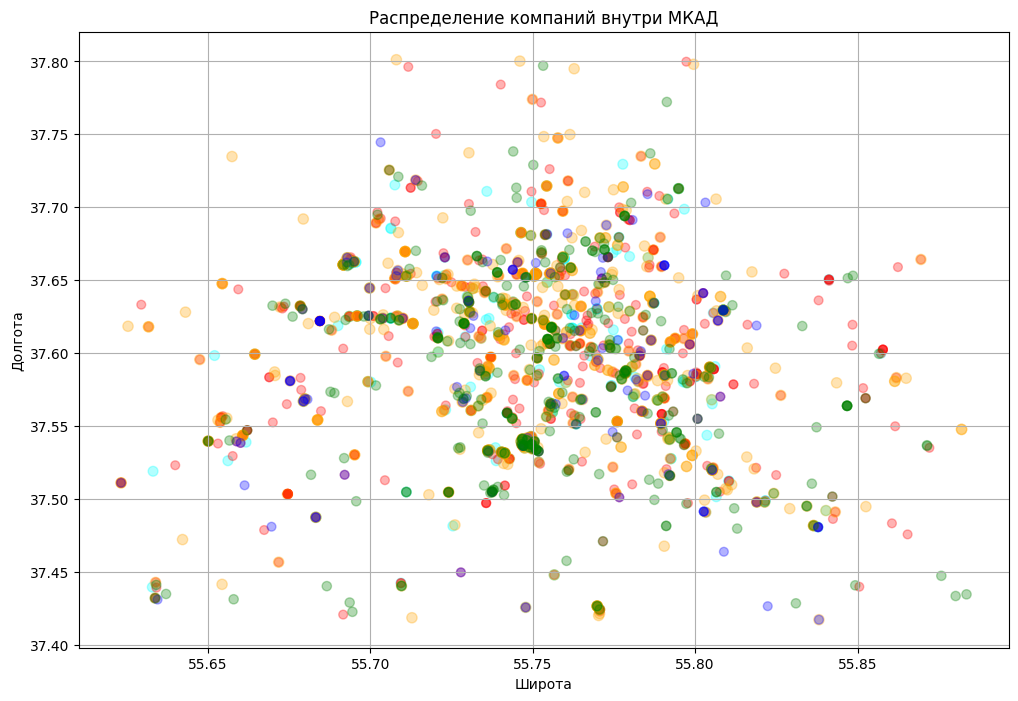

In [140]:
plt.figure(figsize = (12, 8))
plt.scatter(latitudes, longitudes, c = colors, s = volumes, alpha = 0.3)

plt.title('Распределение компаний внутри МКАД')
plt.xlabel('Широта')
plt.ylabel('Долгота')

plt.grid(True)

In [14]:
from google.colab import files
uploaded = files.upload()

Saving boundary-polygon.shx to boundary-polygon.shx


(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

Text(113.44860151948102, 0.5, 'Широта')

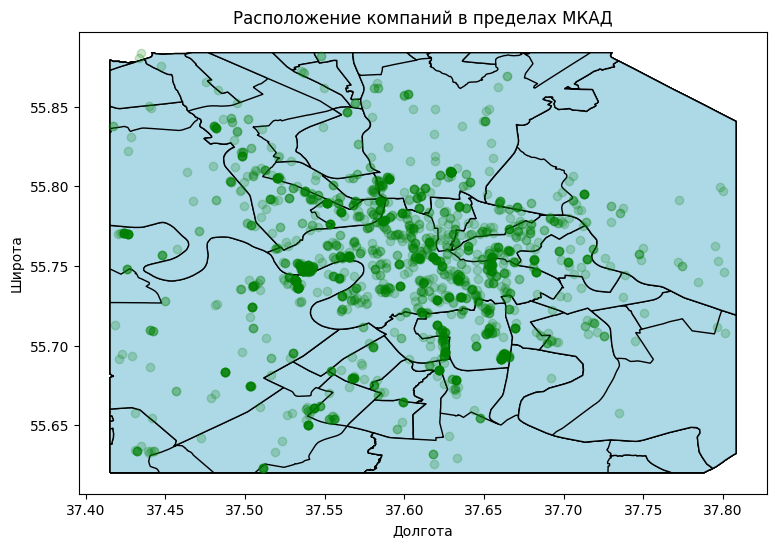

In [141]:
import geopandas as gpd

coordinates = {
    'lat': latitudes,
    'lng': longitudes
}
box = (west, south, east, north)

df = pd.DataFrame(coordinates)
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.lng, df.lat))

city_map = gpd.read_file('boundary-polygon.shx')
city_map = city_map.clip(box)

plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()

city_map.plot(ax = ax, color='lightblue', edgecolor='black')
gdf.plot(ax = ax, color = 'green', alpha = 0.2)

ax.set_title('Расположение компаний в пределах МКАД')
ax.set_xlabel('Долгота')
ax.set_ylabel('Широта')

(2 балла) **Сделайте выводы о проделанной работе:**

In [142]:
salary = {
    'data': [],
    'qa': [],
    'back': [],
    'arch': [],
    'finance':[]
}


def add_salary(job_vacancies, job):
  for vacancy in job_vacancies:
    if not vacancy['salary'] or vacancy['salary']['currency'] != 'RUR':
      continue
    salary_info = vacancy['salary']
    if salary_info['from'] and salary_info['to']:
      salary[job].append((salary_info['from'] + salary_info['to']) // 2)
    elif salary_info['from']:
      salary[job].append(salary_info['from'] * 1.2)
    elif salary_info['to']:
      salary[job].append(salary_info['to'] * 0.8)


add_salary(data, 'data')
add_salary(quality_assurance, 'qa')
add_salary(backend, 'back')
add_salary(architecture, 'arch')
add_salary(finance, 'finance')

averages = { key: np.mean(array) for key, array in salary.items() }
medians = { key: np.median(array) for key, array in salary.items() }

keys = ['data', 'qa', 'back', 'arch', 'finance']
to_profession = {
    'data': "Data engineer",
    'qa': "QA engineer",
    'back': "Backend developer",
    'arch': "Software architect",
    'finance': "Finance analyst"
}

offers = {
    'data': len(data),
    'qa': len(quality_assurance),
    'back': len(backend),
    'arch': len(architecture),
    'finance': len(finance)
}


def display(key):
  response = f"{to_profession[key]} offers average salary of {averages[key]:.2f} RUR with median value {medians[key]:.2f} RUR "
  response += f"(based on {len(salary[key])} samples out of {offers[key]} offers)\n"
  print(response)


for key in keys:
  display(key)


Data engineer offers average salary of 267307.14 RUR with median value 240000.00 RUR (based on 112 samples out of 977 offers)

QA engineer offers average salary of 158257.74 RUR with median value 140000.00 RUR (based on 459 samples out of 2000 offers)

Backend developer offers average salary of 215301.90 RUR with median value 202000.00 RUR (based on 516 samples out of 2000 offers)

Software architect offers average salary of 226706.56 RUR with median value 216000.00 RUR (based on 48 samples out of 355 offers)

Finance analyst offers average salary of 147721.51 RUR with median value 135000.00 RUR (based on 172 samples out of 600 offers)



>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

### 1. Компании не очень любят указывать адреса и зарплаты
Чуть больше трети всех полученных вакансий указали место работы, и около 1/6 указали зарплату

Кстати, во время выполнения заметил, что общее число вакансий увеличивается, в то время как число вакансий с адресом / зарплатой падает :)

### 2. В основном компании располагаются около центра Москвы
Там находится большая часть компаний, указавших свои координаты. Остальные примерно равномерно распределены по южной части города и небольшая часть раскидана по северу

### 3. Наибольший спрос на бэкенд и qa разработчиков
Число их вакансий минимум в 2 раза превышает число вакансий по другим профессиям

При этом большую зарплату предлагают людям, занимающимся архитектурой или работой с данными


## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [42]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 77.9MB/s]


Создадим DataFrame:

In [43]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [44]:
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
min_indexes = diamonds[diamonds['total_sales_price'] == diamonds['total_sales_price'].min()].index
print(*min_indexes, end = ' - ')
print(diamonds['total_sales_price'].min())

max_indexes = diamonds[diamonds['total_sales_price'] == diamonds['total_sales_price'].max()].index
print(*max_indexes, end = ' - ')
print(diamonds['total_sales_price'].max())

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 - 200
219702 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
diamonds.fillna('unknown', inplace = True)
diamonds.stack().value_counts()['unknown']

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
diamonds.columns[diamonds.eq('unknown').any()].to_list()

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
len(diamonds.columns[diamonds.columns.str.startswith('fancy_color') | diamonds.columns.str.startswith('fluor_')].to_list())

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
boring_part = diamonds[diamonds.columns[diamonds.columns.str.startswith('fancy_color') | diamonds.columns.str.startswith('fluor_')]]
boring_part.stack().value_counts().sum() - boring_part.stack().value_counts()['unknown']

111586

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
for column_name in boring_part.columns.to_list():
  del diamonds[column_name]

diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
culet_columns = diamonds.columns[diamonds.columns.str.startswith('culet_')]
culet_part = diamonds[culet_columns]
non_trivial = culet_part.stack().value_counts().sum() - culet_part.stack().value_counts()['unknown']

print(len(culet_columns.to_list()))
print(non_trivial)
print()  # filler

for column_name in culet_columns.to_list():
  del diamonds[column_name]

diamonds

2
149282



,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
diamonds['total_sales_price'].sum() / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds.loc[lambda row: row.index % 2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds.loc[lambda row: row.index % 6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
categories: int = 15
diamonds.loc[:, diamonds.nunique() < categories]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# Начальная колонка была очень большой, не хватало оперативки. Так что здесь просто какая-то подтаблица
excellent = diamonds[(diamonds['cut_quality'] == 'Excellent') & (diamonds['symmetry'] == 'Excellent') & (diamonds['polish'] == 'Excellent') & (diamonds['carat_weight'] >= 1)]
matrix = pd.DataFrame(excellent['total_sales_price'].values.reshape(-1, 1) * excellent['total_sales_price'].values)
matrix

,0,1,2,3,4,5,6,7,8,9,...,19544,19545,19546,19547,19548,19549,19550,19551,19552,19553
0,2280100,3433740,3799160,3965260,3986400,3986400,4004520,4016600,3847480,3850500,...,1456419160,1514999610,1550786610,1553981770,1562614440,1571515890,1693905920,1693905920,1828144920,1986398960
1,3433740,5171076,5721384,5971524,6003360,6003360,6030648,6048840,5794152,5798700,...,2193309384,2281529214,2335423014,2340234798,2353235256,2366640486,2550955008,2550955008,2753113608,2991437904
2,3799160,5721384,6330256,6607016,6642240,6642240,6672432,6692560,6410768,6415800,...,2426722256,2524330476,2583959676,2589283532,2603667504,2618499324,2822428672,2822428672,3046101072,3309787936
3,3965260,5971524,6607016,6895876,6932640,6932640,6964152,6985160,6691048,6696300,...,2532819016,2634694686,2696930886,2702487502,2717500344,2732980614,2945825792,2945825792,3179277192,3454492496
4,3986400,6003360,6642240,6932640,6969600,6969600,7001280,7022400,6726720,6732000,...,2546322240,2648741040,2711309040,2716895280,2731988160,2747550960,2961530880,2961530880,3196226880,3472909440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19549,1571515890,2366640486,2618499324,2732980614,2747550960,2747550960,2760039828,2768365740,2651802972,2653884450,...,1003809417324,1044184886829,1068850401129,1071052604853,1077002509716,1083137666121,1167492684288,1167492684288,1260014381388,1369087991544
19550,1693905920,2550955008,2822428672,2945825792,2961530880,2961530880,2974992384,2983966720,2858326016,2860569600,...,1081986332672,1125506253312,1152092723712,1154466435584,1160879720448,1167492684288,1258417291264,1258417291264,1358144600064,1475712888832
19551,1693905920,2550955008,2822428672,2945825792,2961530880,2961530880,2974992384,2983966720,2858326016,2860569600,...,1081986332672,1125506253312,1152092723712,1154466435584,1160879720448,1167492684288,1258417291264,1258417291264,1358144600064,1475712888832
19552,1828144920,2753113608,3046101072,3179277192,3196226880,3196226880,3210755184,3220440720,3084843216,3087264600,...,1167731805072,1214700601212,1243394001612,1245955825884,1252877352048,1260014381388,1358144600064,1358144600064,1465775118864,1592660483232


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика _(не понимаю, где тут нужна легенда)_
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

<ipython-input-83-91cc7c0dd919>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced['price_log'] = reduced['total_sales_price'].apply(np.log)


Text(0, 0.5, 'Логарифм цены')

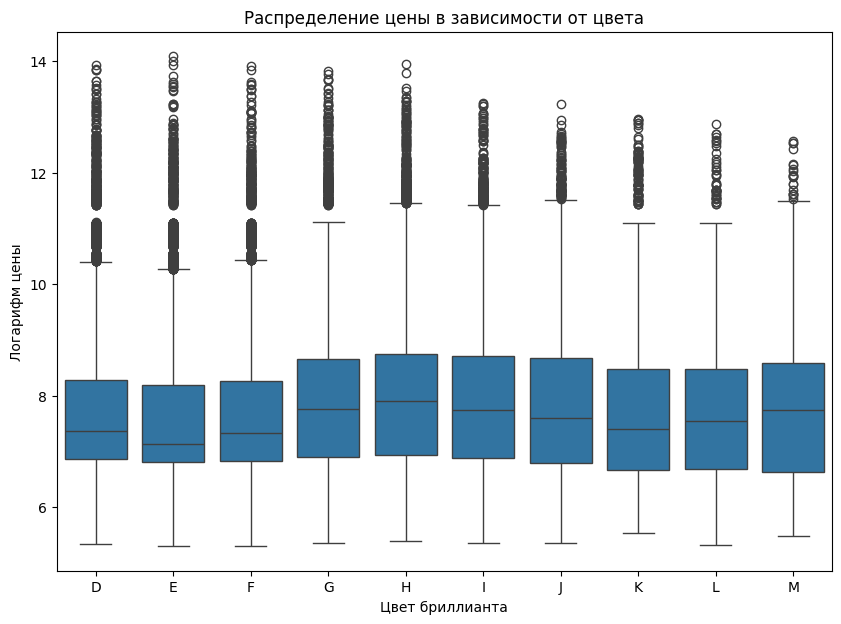

In [ ]:
reduced = diamonds.loc[:, ['color', 'total_sales_price']]
reduced = reduced[reduced['color'] != 'unknown']
reduced['price_log'] = reduced['total_sales_price'].apply(np.log)
reduced = reduced.sort_values(by = 'color')

plt.figure(figsize = (10, 7))
sns.boxplot(x='color', y='price_log', data=reduced)
plt.title('Распределение цены в зависимости от цвета')
plt.xlabel('Цвет бриллианта')
plt.ylabel('Логарифм цены')

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

Text(0, 0.5, 'Логарифм количества бриллиантов')

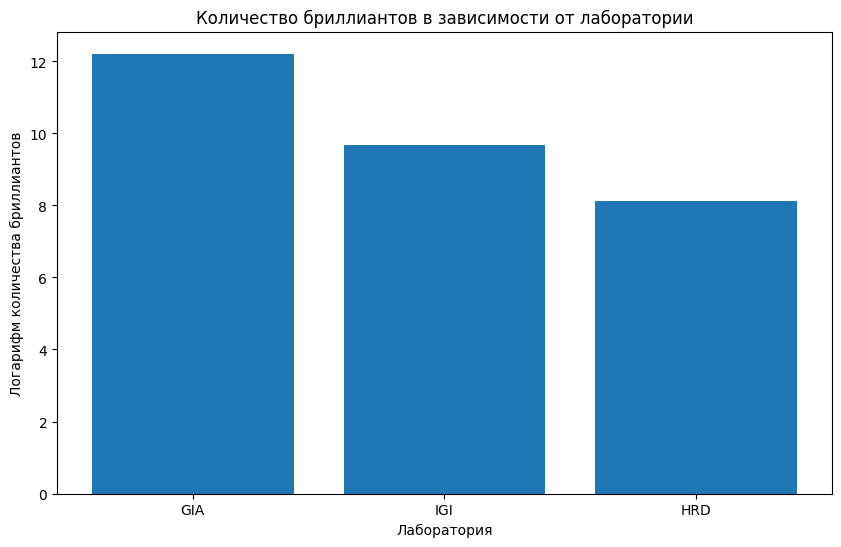

In [ ]:
filtered = diamonds[diamonds['lab'] != 'unknown']
reduced = np.log(filtered['lab'].value_counts())

plt.figure(figsize = (10, 6))
plt.bar(reduced.index, reduced.values)
plt.title('Количество бриллиантов в зависимости от лаборатории')
plt.xlabel('Лаборатория')
plt.ylabel('Логарифм количества бриллиантов')

(2 балла) Постройте график `вес бриллианта - стоимость`:

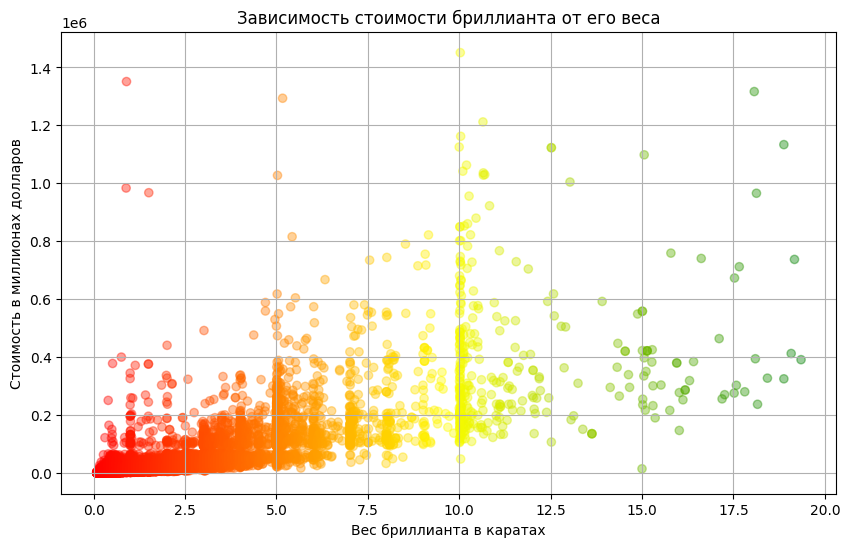

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

reduced = diamonds.loc[:, ['carat_weight', 'total_sales_price']]
reduced = reduced[reduced['carat_weight'] != 'unknown']
reduced['price_log'] = reduced['total_sales_price'].apply(np.log)
reduced = reduced.sort_values(by = 'carat_weight')

cmap = LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
normalized = Normalize(vmin = reduced['carat_weight'].min(), vmax = reduced['carat_weight'].max())

plt.figure(figsize = (10, 6))
plt.scatter(reduced['carat_weight'], reduced['total_sales_price'], c = cmap(normalized(reduced['carat_weight'])), alpha = 0.4)
plt.title('Зависимость стоимости бриллианта от его веса')
plt.xlabel('Вес бриллианта в каратах')
plt.ylabel('Стоимость в миллионах долларов')
plt.grid(True)

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

Text(0, 0.5, 'Логарифм количества бриллиантов')

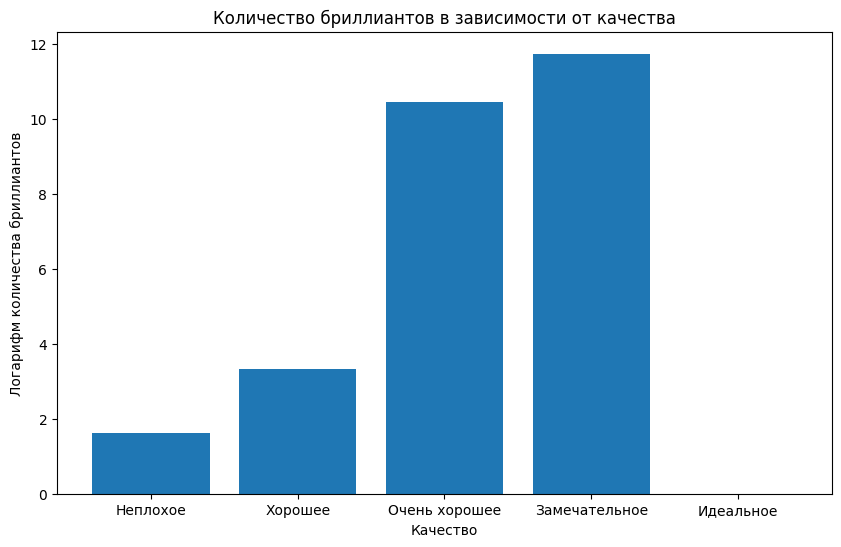

In [ ]:
# То же самое, что и во втором графике
fair = 'Неплохое'
good = 'Хорошее'
very_good = 'Очень хорошее'
excellent = 'Замечательное'
ideal = 'Идеальное'

filtered = diamonds[diamonds['cut_quality'] != 'unknown']
filtered.loc[filtered['cut_quality'] == 'Fair', 'cut_quality'] = fair
filtered.loc[filtered['cut_quality'] == 'Good', 'cut_quality'] = good
filtered.loc[filtered['cut_quality'] == 'Very Good', 'cut_quality'] = very_good
filtered.loc[filtered['cut_quality'] == 'Excellent', 'cut_quality'] = excellent
filtered.loc[filtered['cut_quality'] == 'Ideal', 'cut_quality'] = ideal

reduced = np.log(filtered['cut_quality'].value_counts())
sorted = reduced.loc[[fair, good, very_good, excellent, ideal]]

plt.figure(figsize = (10, 6))
plt.bar(sorted.index, sorted.values)
plt.title('Количество бриллиантов в зависимости от качества')
plt.xlabel('Качество')
plt.ylabel('Логарифм количества бриллиантов')

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

### 1. Цвет не влияет на цену бриллианта
На первом графике видно, что зависимость цены камня от его цвета несущественна (медианные значения отличаются в 2-3 раза), все цвета имеют примерно равные цены

### 2. В основном бриллианты проверяются в лаборатории GIA
Из второго графика видно, что числа отличаются в несколько раз

### 3. Вес бриллианта незначительно влияет на его цену
Из третьего графика понятно, что цена камня может быть как и достаточно низкой, так и очень высокой вне зависимости от его веса (особенно хорошо видно на выборке весом 10 карат). При этом более тяжелые бриллианты все же по большей части дороже легких

### 4. Наиболее востребованы камни качества "Очень хорошее" - "Замечательное"
Бриллианты меньшего качества тоже пользуются спросом, но их производят гораздо меньше. В то время как идеальные бриллианты почти не производятся



## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [45]:
save = ['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']
diamonds = diamonds[diamonds.columns[diamonds.columns.isin(save)]]
diamonds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [46]:
diamonds = diamonds.sample(frac = 1)
diamonds

,meas_length,meas_width,meas_depth,total_sales_price
156761,5.10,4.96,3.41,4229
161363,5.95,6.02,3.78,4629
48869,5.70,3.79,2.33,928
158270,6.01,6.09,3.87,4493
208939,8.21,8.28,4.99,27814
...,...,...,...,...
156613,6.18,6.24,3.79,4212
170231,6.73,6.76,4.27,5952
102710,0.00,0.00,0.00,1680
142238,5.09,5.12,3.20,3444


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [47]:
# Сумму Минковского считаем как корень 3 степени из суммы кубов
diamonds['sum'] = diamonds.apply(lambda row: (row['meas_length']**3 + row['meas_width']**3 + row['meas_depth']**3)**(1/3), axis = 1)
diamonds

,meas_length,meas_width,meas_depth,total_sales_price,sum
156761,5.10,4.96,3.41,4229,6.651862
161363,5.95,6.02,3.78,4629,7.845051
48869,5.70,3.79,2.33,928,6.318717
158270,6.01,6.09,3.87,4493,7.941812
208939,8.21,8.28,4.99,27814,10.758663
...,...,...,...,...,...
156613,6.18,6.24,3.79,4212,8.110141
170231,6.73,6.76,4.27,5952,8.843345
102710,0.00,0.00,0.00,1680,0.000000
142238,5.09,5.12,3.20,3444,6.685824


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [121]:
data = diamonds.loc[:, ['sum', 'total_sales_price']]
data

,sum,total_sales_price
156761,6.651862,4229
161363,7.845051,4629
48869,6.318717,928
158270,7.941812,4493
208939,10.758663,27814
...,...,...
156613,8.110141,4212
170231,8.843345,5952
102710,0.000000,1680
142238,6.685824,3444


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [122]:
size: int = int(len(data) * 4 / 5)
training = data.head(size)
testing = data.iloc[size:]

print(training)
print(testing)

              sum  total_sales_price
156761   6.651862               4229
161363   7.845051               4629
48869    6.318717                928
158270   7.941812               4493
208939  10.758663              27814
...           ...                ...
158300   9.738434               4287
54361    5.618633                954
18154    5.615143                700
107651   6.131912               1920
51020    5.730498                936

[175762 rows x 2 columns]
             sum  total_sales_price
119353  7.475716               2386
70159   6.307621               1052
176047  7.205491               6570
74993   5.669858               1130
163646  8.255790               5044
...          ...                ...
156613  8.110141               4212
170231  8.843345               5952
102710  0.000000               1680
142238  6.685824               3444
189180  8.660981              10908

[43941 rows x 2 columns]


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

Text(0, 0.5, 'Стоимость в миллионах долларов')

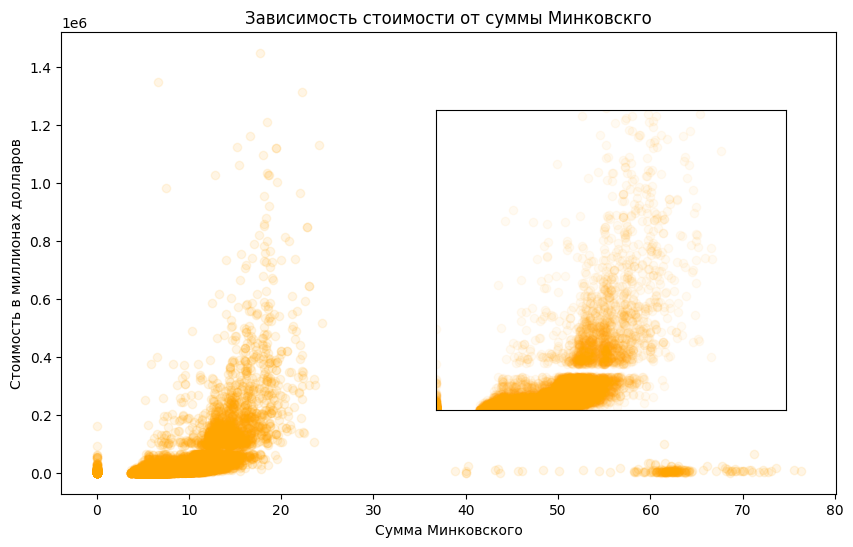

In [131]:
fig, ax = plt.subplots()

ax.scatter(training['sum'], training['total_sales_price'], color = 'orange', alpha = 0.1)

ax_inner = plt.axes([0.5, 0.25, 0.35, 0.5])
ax_inner.scatter(training['sum'], training['total_sales_price'], color = 'orange', alpha = 0.05)

ax_inner.set_xlim(0, 30)
ax_inner.set_ylim(0, 600_000)

ax_inner.set_xticks([])
ax_inner.set_yticks([])

ax.set_title('Зависимость стоимости от суммы Минковскго')
ax.set_xlabel('Сумма Минковского')
ax.set_ylabel('Стоимость в миллионах долларов')

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

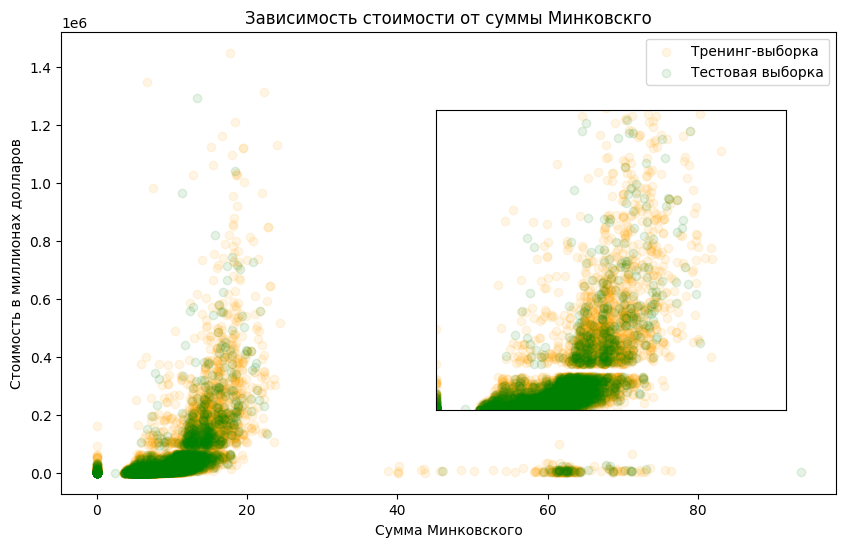

In [51]:
fig, ax = plt.subplots()

ax.scatter(training['sum'], training['total_sales_price'], color = 'orange', alpha = 0.1, label = 'Тренинг-выборка')
ax.scatter(testing['sum'], testing['total_sales_price'], color = 'green', alpha = 0.1, label = 'Тестовая выборка')

ax_inner = plt.axes([0.5, 0.25, 0.35, 0.5])
ax_inner.scatter(training['sum'], training['total_sales_price'], color = 'orange', alpha = 0.1)
ax_inner.scatter(testing['sum'], testing['total_sales_price'], color = 'green', alpha = 0.1)

ax_inner.set_xlim(0, 30)
ax_inner.set_ylim(0, 600_000)

ax_inner.set_xticks([])
ax_inner.set_yticks([])

ax.set_title('Зависимость стоимости от суммы Минковскго')
ax.set_xlabel('Сумма Минковского')
ax.set_ylabel('Стоимость в миллионах долларов')
ax.legend()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [124]:
from scipy.spatial import KDTree

train_norm = training.copy()
train_norm.loc[:, 'sum'] /= 60
train_norm.loc[:, 'total_sales_price'] /= 600_000

test_norm = testing.copy()
test_norm.loc[:, 'sum'] /= 60
test_norm.loc[:, 'total_sales_price'] /= 600_000

kdtree = KDTree(train_norm[['sum', 'total_sales_price']].values)
closest = kdtree.query(test_norm[['sum', 'total_sales_price']].values, k = 1)[1]
test_norm['closest'] = closest

test_norm

,sum,total_sales_price,closest
119353,0.124595,0.003977,118136
70159,0.105127,0.001753,171880
176047,0.120092,0.010950,159451
74993,0.094498,0.001883,118933
163646,0.137597,0.008407,145218
...,...,...,...
156613,0.135169,0.007020,151001
170231,0.147389,0.009920,5114
102710,0.000000,0.002800,15319
142238,0.111430,0.005740,100393


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [127]:
def difference(row_test, row_train):
  base = row_train['total_sales_price']
  value = row_test['total_sales_price']
  return 100 * (value - base) / base

if 'difference' not in test_norm.columns.to_list():
  test_norm.insert(3, 'difference', None)

for index, row in test_norm.iterrows():
  diff = difference(row, train_norm.iloc[row['closest']])
  test_norm.at[index, 'difference'] = diff

test_norm

,sum,total_sales_price,closest,difference
119353,0.124595,0.003977,118136,0.930626
70159,0.105127,0.001753,171880,-0.754717
176047,0.120092,0.010950,159451,-1.351351
74993,0.094498,0.001883,118933,0.0
163646,0.137597,0.008407,145218,0.578265
...,...,...,...,...
156613,0.135169,0.007020,151001,-0.284091
170231,0.147389,0.009920,5114,0.320243
102710,0.000000,0.002800,15319,0.0
142238,0.111430,0.005740,100393,-0.116009


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)